In [57]:
import numpy as np
import pandas as pd

In [58]:
!pip install kaggle

# Importing Dataset

In [59]:
!kaggle datasets download -d nelgiriyewithana/most-streamed-spotify-songs-2024

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024
License(s): CC-BY-SA-4.0
most-streamed-spotify-songs-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


Extracting the dataset

In [60]:
import zipfile
with zipfile.ZipFile('most-streamed-spotify-songs-2024.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [62]:
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv')
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [63]:
#shape of the data
df.shape

(4600, 29)

# Initial Data Exploration

In [64]:
#Understanding the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [65]:
#Checking the missing value.
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [66]:
#Dropping columns with extensive missing values
df.drop(columns=['Soundcloud Streams', 'TIDAL Popularity'], axis= 1, inplace= True)
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384","11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","457,017",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,3.0,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","656,337",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,"193,590",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,19.0,204,NaN,1.0,74,6.0,"84,426,740","28,999","1,135,998",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,1.0,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,"448,292",0


In [67]:
#removing ',' in column "All Time Rank"
def remove(x):
    return x.replace(",","")

df["All Time Rank"]=df["All Time Rank"].apply(remove)
df["All Time Rank"]

0          1
1          2
2          3
3          4
4          5
        ... 
4595    4585
4596    4575
4597    4571
4598    4591
4599    4593
Name: All Time Rank, Length: 4600, dtype: object

In [68]:
#change All Time Rank column to Numeric
df['All Time Rank'] = df['All Time Rank'].astype(int)
df['All Time Rank']

0          1
1          2
2          3
3          4
4          5
        ... 
4595    4585
4596    4575
4597    4571
4598    4591
4599    4593
Name: All Time Rank, Length: 4600, dtype: int32

In [69]:
def remove(x):
    return x.replace(",","")

In [70]:
# Change Release Date from object to date time format
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: Release Date, Length: 4600, dtype: datetime64[ns]

In [71]:
#removing ',' from string
df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,196631588,...,210.0,40975,684,62.0,17598718,114.0,18004655,22931,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,174597137,...,188.0,40778,3,67.0,10422430,111.0,7780028,28444,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,211607669,...,190.0,74333,536,136.0,36321847,172.0,5022621,5639,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,136569078,...,394.0,1474799,2182,264.0,24684248,210.0,190260277,203384,11822942,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,151469874,...,182.0,12185,1,82.0,17660624,105.0,4493884,7006,457017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,305049963,65770,5103054,...,3.0,6,NaN,2.0,14217,NaN,20104066,13184,656337,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,52282360,4602,1449767,...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,193590,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,189972685,72066,6704802,...,19.0,204,NaN,1.0,74,6.0,84426740,28999,1135998,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,145467020,14037,7387064,...,1.0,1200,NaN,NaN,NaN,7.0,6817840,NaN,448292,0


In [72]:
#Convert DataFrame Columns from Index 6 to Integer Type
for x in df.columns[6:]:
    df[x] = pd.to_numeric(df[x],downcast="integer")
    print(df[x].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int8


In [73]:
#"The data types have been properly assigned according to the column data."

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

# Dealing with Missing Values

In [74]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Shazam Counts                  577
Explicit Track                   0
dtype: int64

In [75]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1


In [76]:
#Since there are only 5 missing values in the 'Artist' column, it needs to be dropped.
df.dropna(subset='Artist', inplace= True)

In [81]:
#Verify the Changes
df['Artist'].isnull().sum()

0

<Axes: ylabel='Density'>

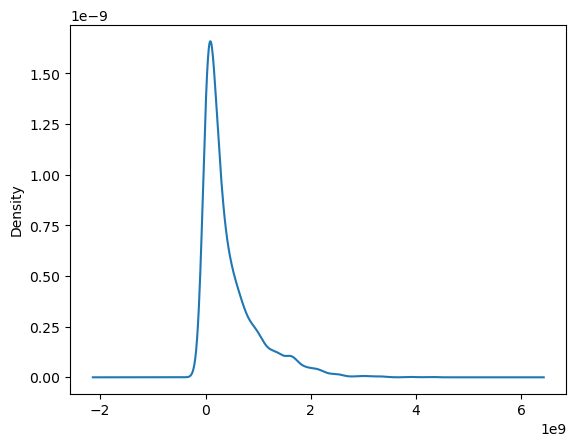

In [128]:
#With 113 Missing Values in the 'Spotify Streams' Column, Skewness Should Be Checked and Appropriate Handling Methods Decided
from scipy.stats import skew
import matplotlib.pyplot as plt

column_ss = 'Spotify Streams'
df[column_ss].plot(kind='kde')

In [129]:
#Given the right-skewed data distribution, we fill null values in 'Spotify Streams' column with the median.

median_value = df[column_ss].median()
df[column_ss].fillna(median_value, inplace = True)

In [130]:
#Verify the Changes
df['Spotify Streams'].isnull().sum()

0

In [131]:
#Given that the other columns seem to be in the same condition as the 'Spotify Streams' column, we assess the skewness of all numeric data columns.
for i in df.select_dtypes(np.number):
    print(i,round(df[i].skew(),2))

All Time Rank 0.0
Track Score 5.69
Spotify Streams 2.06
Spotify Playlist Count 1.86
Spotify Playlist Reach 2.62
Spotify Popularity -2.35
YouTube Views 6.22
YouTube Likes 4.39
TikTok Posts 8.77
TikTok Likes 35.94
TikTok Views 34.79
YouTube Playlist Reach 4.24
Apple Music Playlist Count 3.14
AirPlay Spins 5.46
SiriusXM Spins 8.3
Deezer Playlist Count 5.4
Deezer Playlist Reach 6.86
Amazon Playlist Count 2.64
Pandora Streams 3.71
Pandora Track Stations 7.87
Shazam Counts 19.58
Explicit Track 0.59


In [132]:
#Median Imputation Applied to Columns 7 Through 27
for i in df.columns[7:27]:
    df[i].fillna(df[i].median(),inplace=True)

In [133]:
df.isnull().sum()

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
dtype: int64

In [135]:
df.drop_duplicates(inplace= True)

In [136]:
df.duplicated().sum()

0

In [122]:
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,...,3.0,6.0,86.0,2.0,14217.0,17.0,20104066.0,13184.0,656337.0,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,...,1.0,412.0,86.0,1.0,927.0,17.0,12735768.5,7832.0,193590.0,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,...,19.0,204.0,86.0,1.0,74.0,6.0,84426740.0,28999.0,1135998.0,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,...,1.0,1200.0,86.0,15.0,237120.5,7.0,6817840.0,7832.0,448292.0,0


In [123]:
df.isnull().sum()

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
dtype: int64

In [124]:
df.to_csv('Most Streamed Spotify Songs 2024_cleaned data.csv', index= False)

# Descriptive Statistics

In [141]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1


In [126]:
df.describe()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
count,4593.000000,4593.000000,4.593000e+03,4593.000000,4.593000e+03,4593.000000,4.593000e+03,4.593000e+03,4.593000e+03,4.593000e+03,...,4593.000000,4.593000e+03,4593.000000,4593.000000,4.593000e+03,4593.000000,4.593000e+03,4.593000e+03,4.593000e+03,4593.000000
mean,2291.352928,41.840235,4.425264e+08,59014.203244,2.320455e+07,64.107773,3.859938e+08,2.817760e+06,7.508795e+05,9.440108e+07,...,51.391901,4.985441e+04,178.433921,28.867189,1.082917e+06,23.438058,6.820817e+07,6.589660e+04,2.319541e+06,0.359460
std,1322.967651,38.562767,5.331083e+08,70712.692717,2.950021e+07,14.773933,6.813903e+08,4.456529e+06,2.135280e+06,4.893650e+08,...,67.711127,1.218335e+05,416.195109,49.062436,3.207116e+06,23.096292,1.496897e+08,2.250241e+05,5.677761e+06,0.479894
min,1.000000,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000e+00,1.000000e+00,0.000000
25%,1145.000000,23.300000,7.296286e+07,6918.000000,4.886494e+06,62.000000,4.568364e+07,4.479830e+05,6.735000e+04,9.369979e+06,...,12.000000,7.060000e+02,74.000000,7.000000,8.341000e+04,10.000000,2.593246e+06,2.727000e+03,2.881370e+05,0.000000
50%,2291.000000,29.900000,2.398507e+08,32312.500000,1.325948e+07,67.000000,1.482696e+08,1.257935e+06,1.822000e+05,2.653441e+07,...,28.000000,5.953500e+03,86.000000,15.000000,2.371205e+05,17.000000,1.273577e+07,7.832000e+03,8.545840e+05,0.000000
75%,3437.000000,44.400000,6.130008e+08,85006.000000,2.931790e+07,71.000000,4.206695e+08,3.358774e+06,4.607730e+05,6.744172e+07,...,60.000000,3.647400e+04,103.000000,30.000000,6.091860e+05,28.000000,4.677397e+07,2.365300e+04,2.243715e+06,1.000000
max,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,...,859.000000,1.777811e+06,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,2.197945e+08,1.000000


# Exploratory Data Analysis (EDA)

A. Song Popularity Analysis

   Song Popularity Analysis aims to determine the characteristics of the most popular songs by comparing certain metrics (such as "Track Score", "Spotify Streams", "YouTube Views", and "TikTok Views") with "All Time Rank". In other words, we want to understand how various popularity metrics relate to the all-time rank of a song.


a. Univariate Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
file = 'Most Streamed Spotify Songs 2024_cleaned data.csv'

df = pd.read_csv('Most Streamed Spotify Songs 2024_cleaned data.csv', sep=',')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1


1. Spotify Stream Distribution

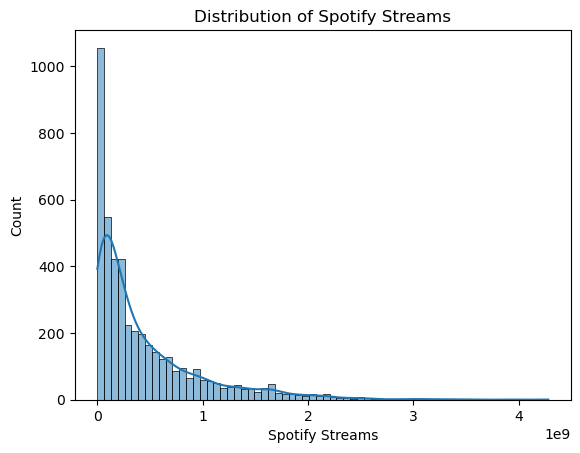

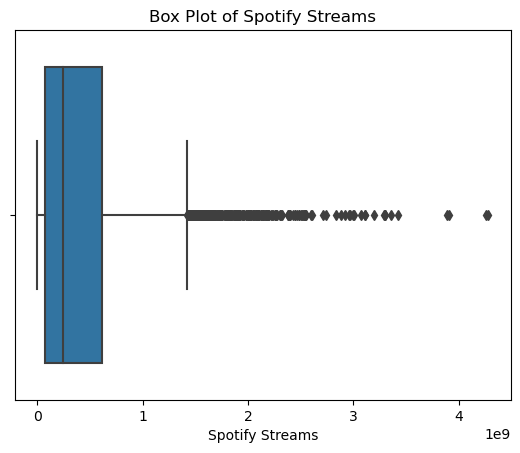

In [9]:
sns.histplot(df['Spotify Streams'], kde=True)
plt.title('Distribution of Spotify Streams')
plt.show()

sns.boxplot(x=df['Spotify Streams'])
plt.title('Box Plot of Spotify Streams')
plt.show()

2. YouTube Views Distribution

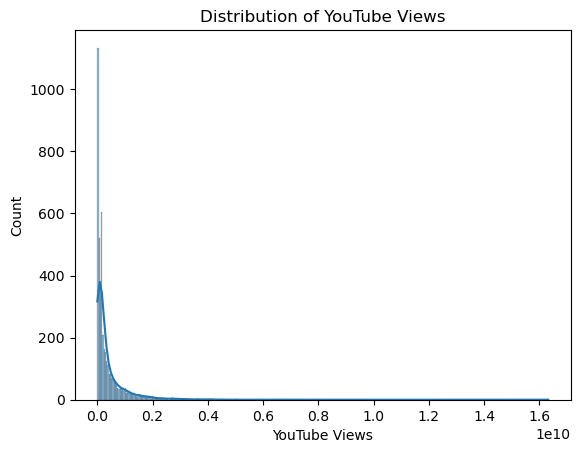

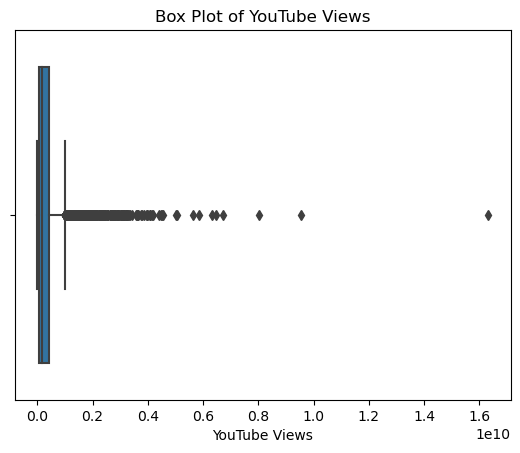

In [10]:
sns.histplot(df['YouTube Views'], kde=True)
plt.title('Distribution of YouTube Views')
plt.show()

sns.boxplot(x=df['YouTube Views'])
plt.title('Box Plot of YouTube Views')
plt.show()

3. TikTok Views Distribution

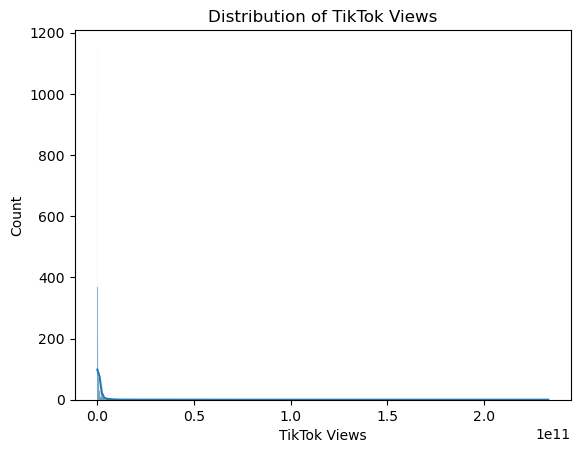

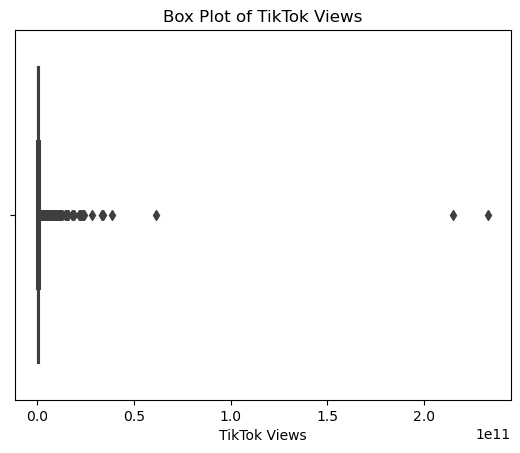

In [12]:
sns.histplot(df['TikTok Views'], kde=True)
plt.title('Distribution of TikTok Views')
plt.show()

sns.boxplot(x=df['TikTok Views'])
plt.title('Box Plot of TikTok Views')
plt.show()

4. Track Score Distribution

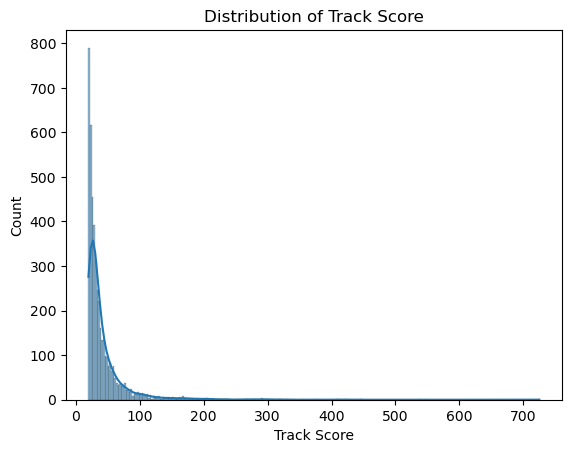

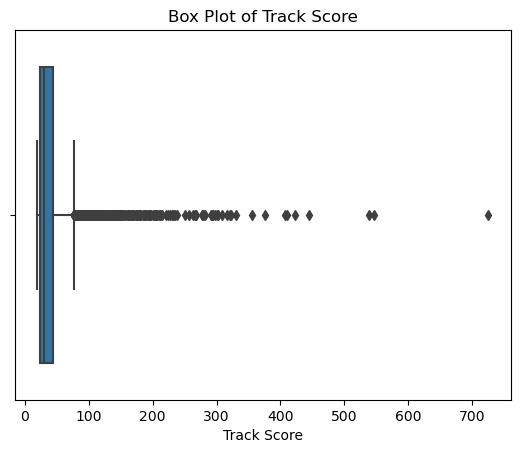

In [13]:
sns.histplot(df['Track Score'], kde=True)
plt.title('Distribution of Track Score')
plt.show()

sns.boxplot(x=df['Track Score'])
plt.title('Box Plot of Track Score')
plt.show()

b. Bivariate Analysis

In [4]:
corr_matrix = df[['Track Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'All Time Rank']].corr()

print(corr_matrix)

                 Track Score  Spotify Streams  YouTube Views  TikTok Views  \
Track Score         1.000000         0.246950       0.196961      0.103206   
Spotify Streams     0.246950         1.000000       0.426132      0.039742   
YouTube Views       0.196961         0.426132       1.000000      0.008867   
TikTok Views        0.103206         0.039742       0.008867      1.000000   
All Time Rank      -0.633427        -0.290874      -0.225428     -0.100974   

                 All Time Rank  
Track Score          -0.633427  
Spotify Streams      -0.290874  
YouTube Views        -0.225428  
TikTok Views         -0.100974  
All Time Rank         1.000000  


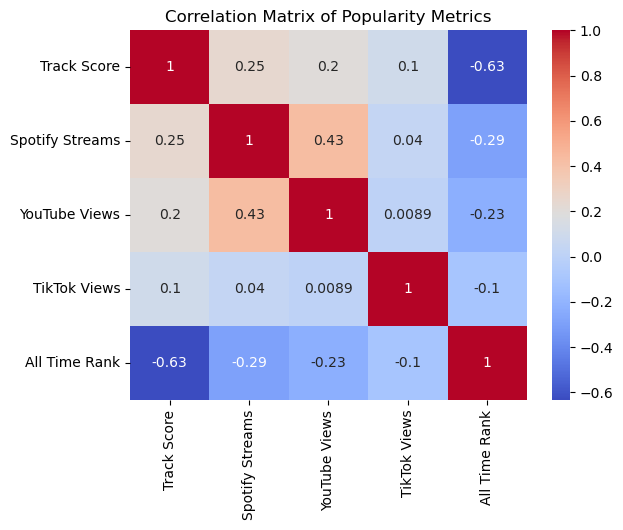

In [6]:
#visualization for correlation
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
plt.title('Correlation Matrix of Popularity Metrics')
plt.show()

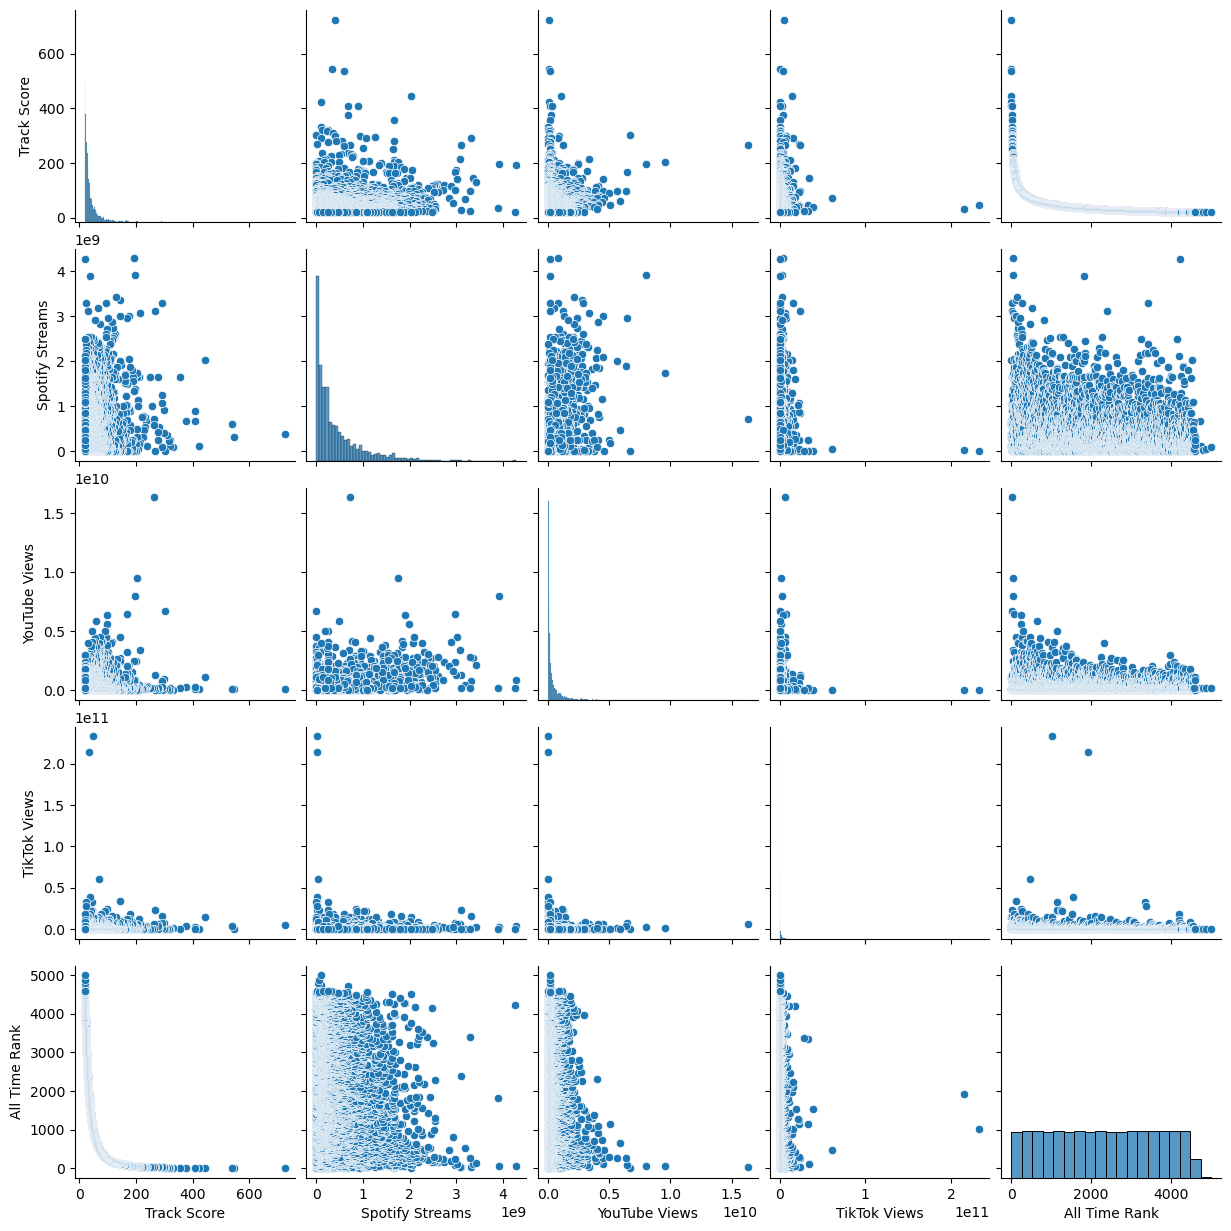

In [7]:
#scatter plot for visualization
sns.pairplot(df[['Track Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'All Time Rank']])
plt.show()

c. Regression Analysis

In [8]:
X = df[['Spotify Streams', 'YouTube Views', 'TikTok Views']]
y = df['Track Score']
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Track Score   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           8.15e-83
Time:                        16:39:13   Log-Likelihood:                -23100.
No. Observations:                4593   AIC:                         4.621e+04
Df Residuals:                    4589   BIC:                         4.623e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              32.4522      0.726     

B. Platform Comparison Analysis

Compare the popularity of songs across different platforms to see where certain songs do best.

In [20]:
# Descriptive Statistics
platform_metrics = ['Spotify Streams', 'YouTube Views', 'TikTok Views',
                    'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
                    'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Shazam Counts']
df[platform_metrics].describe()

,Spotify Streams,YouTube Views,TikTok Views,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts
count,4.593000e+03,4.593000e+03,4.593000e+03,4593.000000,4.593000e+03,4593.000000,4.593000e+03,4593.000000,4.593000e+03,4.593000e+03
mean,4.425264e+08,3.859938e+08,9.713671e+08,51.391901,4.985441e+04,178.433921,1.082917e+06,23.438058,6.820817e+07,2.319541e+06
std,5.331083e+08,6.813903e+08,5.233491e+09,67.711127,1.218335e+05,416.195109,3.207116e+06,23.096292,1.496897e+08,5.677761e+06
min,1.071000e+03,9.130000e+02,1.900000e+01,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000e+00
25%,7.296286e+07,4.568364e+07,9.347036e+07,12.000000,7.060000e+02,74.000000,8.341000e+04,10.000000,2.593246e+06,2.881370e+05
50%,2.398507e+08,1.482696e+08,2.659172e+08,28.000000,5.953500e+03,86.000000,2.371205e+05,17.000000,1.273577e+07,8.545840e+05
75%,6.130008e+08,4.206695e+08,6.317814e+08,60.000000,3.647400e+04,103.000000,6.091860e+05,28.000000,4.677397e+07,2.243715e+06
max,4.281469e+09,1.632276e+10,2.332323e+11,859.000000,1.777811e+06,7098.000000,4.819785e+07,210.000000,1.463624e+09,2.197945e+08


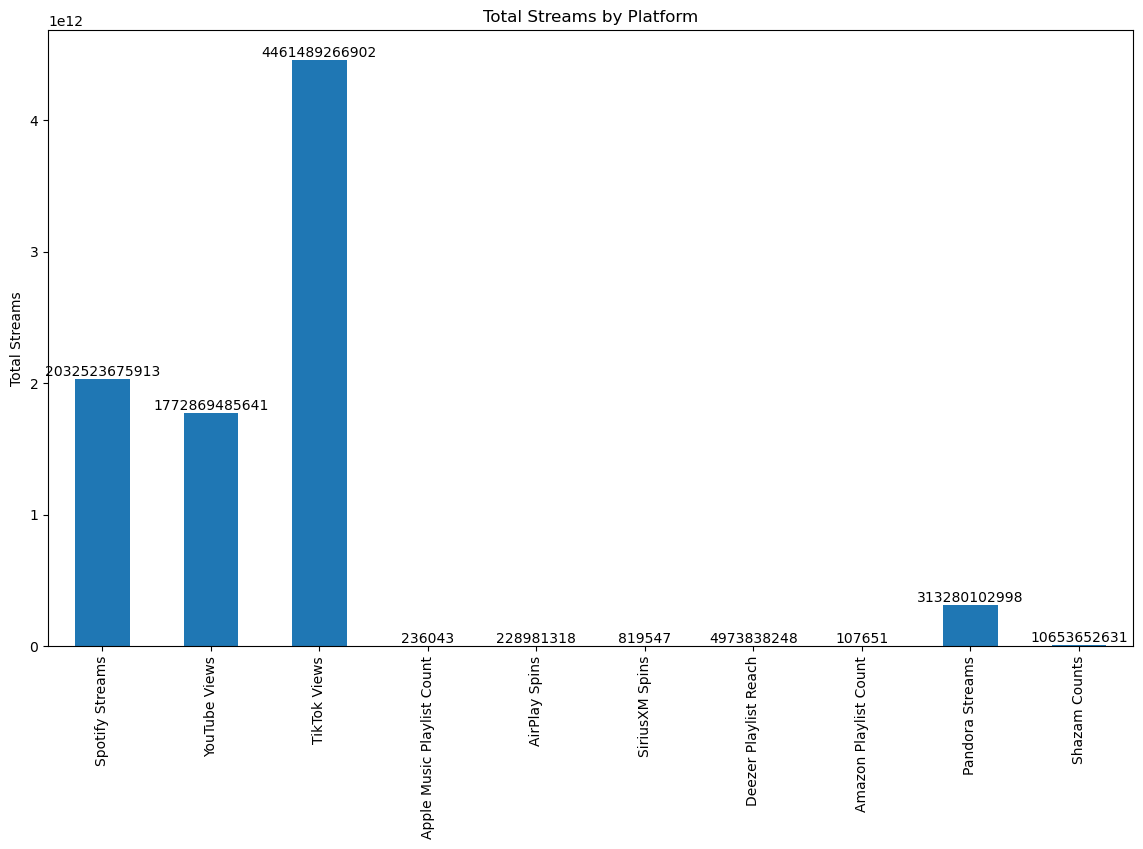

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MILLION DOLLAR BABY'),
  Text(1, 0, 'Not Like Us'),
  Text(2, 0, 'i like the way you kiss me'),
  Text(3, 0, 'Flowers'),
  Text(4, 0, 'Houdini'),
  Text(5, 0, 'Lovin On Me'),
  Text(6, 0, 'Beautiful Things'),
  Text(7, 0, 'Gata Only'),
  Text(8, 0, 'Danza Kuduro - Cover'),
  Text(9, 0, 'BAND4BAND (feat. Lil Baby)')])

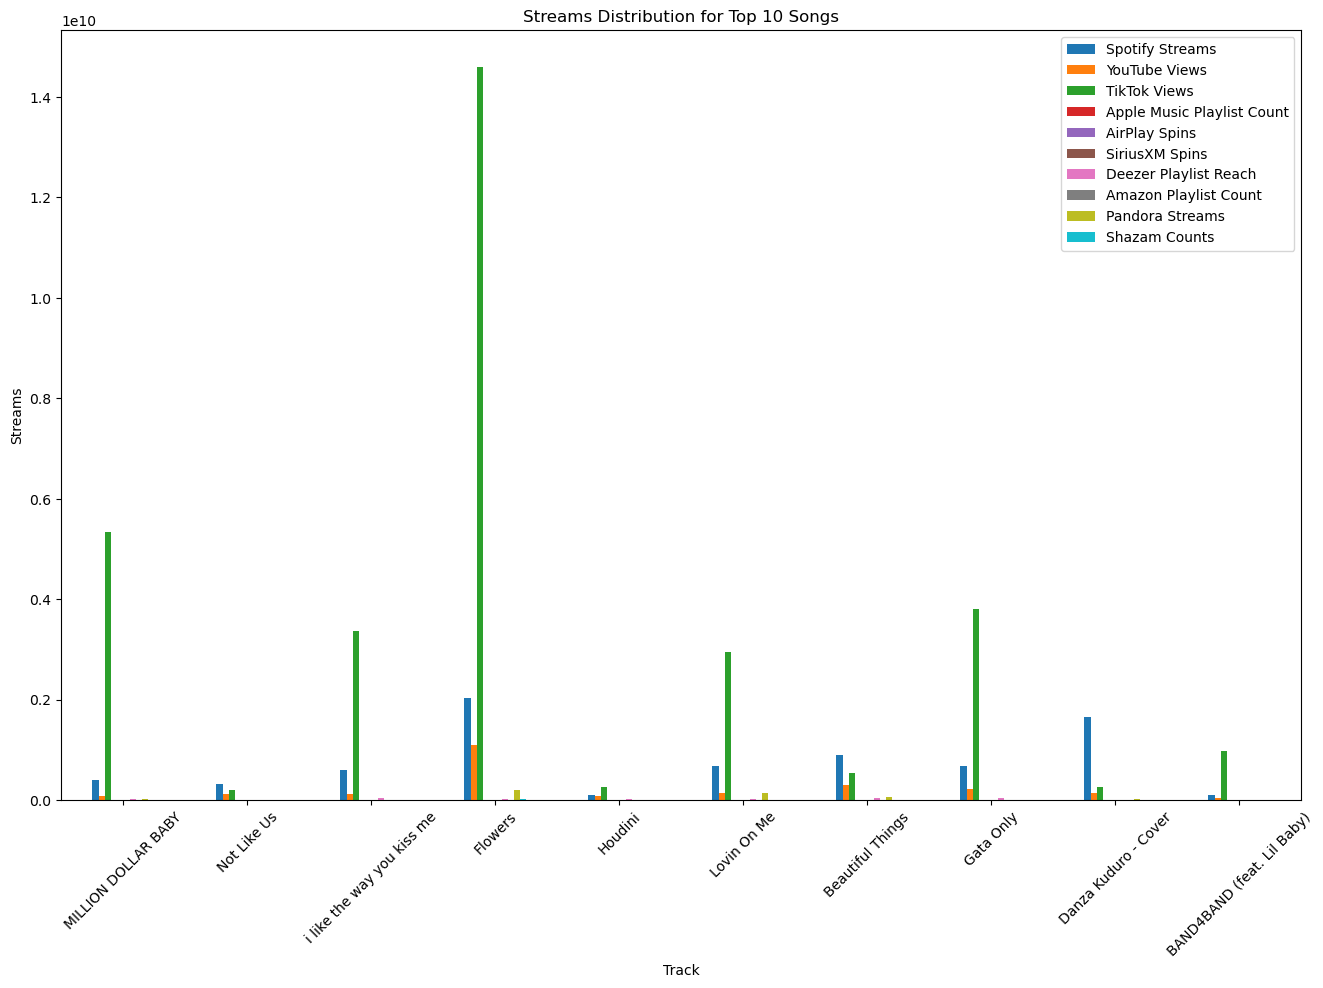

In [31]:
# Visualization - Total Streams by Platform
total_streams = df[platform_metrics].sum()
ax = total_streams.plot(kind='bar', figsize=(14, 8), title='Total Streams by Platform')
plt.ylabel('Total Streams')

# Adding a number above each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='%.0f')

plt.show()

# Distribution of Streams for Top Songs
top_songs = df[df['All Time Rank'] <= 10]
ax2 = top_songs.set_index('Track')[platform_metrics].plot(kind='bar', figsize=(16, 10), title='Streams Distribution for Top 10 Songs')
plt.ylabel('Streams')
plt.xlabel('Track')
plt.xticks(rotation=45)

C. Explicit Content Analysis

This analysis aims to evaluate the explicit content of songs and their impact on popularity and distribution.

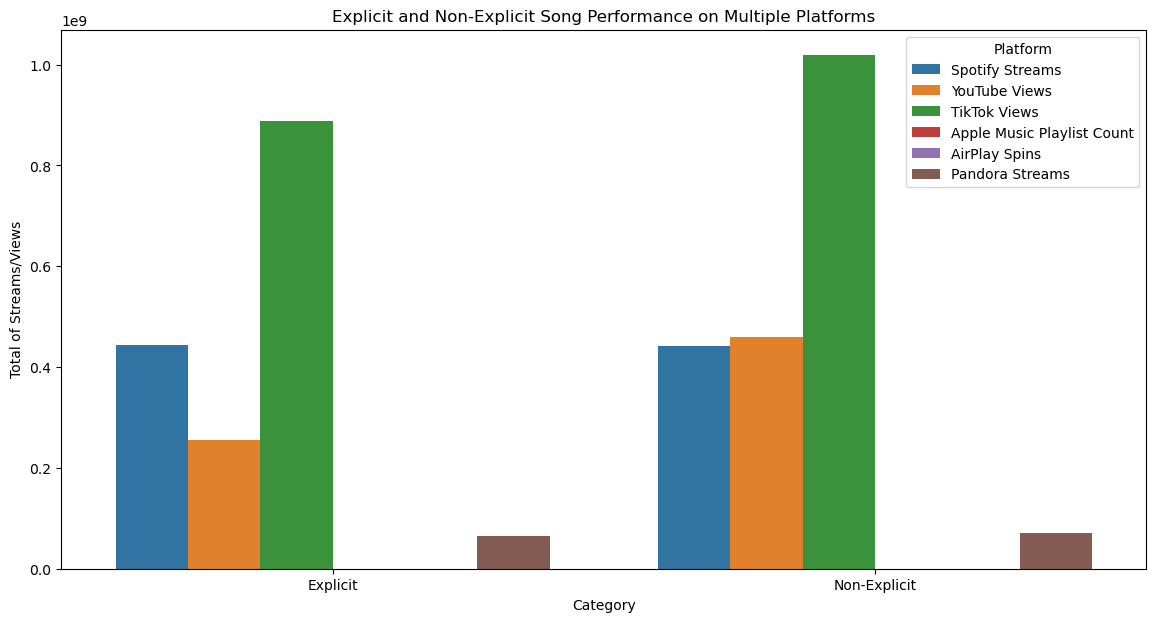

In [32]:
df['Explicit'] = df['Explicit Track'].apply(lambda x: 'Explicit' if x == 1 else 'Non-Explicit')

# Correlation analysis between explicit labels and number of streams
explicit_analysis = df.groupby('Explicit')[platforms].mean().reset_index()

# Comparative visualization of explicit and non-explicit song performance
plt.figure(figsize=(14, 7))
sns.barplot(data=explicit_analysis.melt(id_vars='Explicit'), x='Explicit', y='value', hue='variable')
plt.title('Explicit and Non-Explicit Song Performance on Multiple Platforms')
plt.xlabel('Category')
plt.ylabel('Total of Streams/Views')
plt.legend(title='Platform')
plt.show()
